In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('D:\dev\project\Football-Match-Prediction\data\processed\df_merged.csv')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Time                                    2760 non-null   object 
 1   Season                                  2760 non-null   int64  
 2   Round                                   2760 non-null   int64  
 3   HomeTeam_GF                             2760 non-null   float64
 4   HomeTeam_Result                         2760 non-null   object 
 5   HomeTeam_Standard__SoT%_avg_last5       2746 non-null   float64
 6   HomeTeam_GCA Types__TO_avg_last5        2746 non-null   float64
 7   HomeTeam_Standard__G/Sh_avg_last5       2746 non-null   float64
 8   HomeTeam_GCA Types__GCA_avg_last5       2746 non-null   float64
 9   HomeTeam_Challenges__Lost_avg_last5     2746 non-null   float64
 10  HomeTeam_Performance__Save%_avg_last5   2746 non-null   floa

In [51]:
data.dropna(inplace=True)

In [52]:
# Ensure 'Time' is in datetime format
data['Time'] = pd.to_datetime(data['Time'])

# Split the data into training and validation sets
train = data[data['Season'] < 2023]
valid = data[data['Season'] >= 2023]
train = train.iloc[50:]

In [53]:
from sklearn.preprocessing import StandardScaler


y_train = train['HomeTeam_Result'].map({'W' : 2, 'D' : 1, 'L' : 0})
y_valid = valid['HomeTeam_Result'].map({'W' : 2, 'D' : 1, 'L' : 0})
X_train = train.drop(columns=['Time', 'Season', 'HomeTeam_Result', 'HomeTeam_GF', 'AwayTeam_GF'])
X_valid = valid.drop(columns=['Time', 'Season', 'HomeTeam_Result', 'HomeTeam_GF', 'AwayTeam_GF'])

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [54]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((2211, 41), (2211,), (480, 41), (480,))

In [55]:
X_valid.head()

,Round,HomeTeam_Standard__SoT%_avg_last5,HomeTeam_GCA Types__TO_avg_last5,HomeTeam_Standard__G/Sh_avg_last5,HomeTeam_GCA Types__GCA_avg_last5,HomeTeam_Challenges__Lost_avg_last5,HomeTeam_Performance__Save%_avg_last5,HomeTeam_GCA Types__Sh_avg_last5,HomeTeam_Standard__SoT_avg_last5,HomeTeam_Performance__PSxG_avg_last5,...,AwayTeam_Err_avg_last5,AwayTeam_GCA Types__PassLive_avg_last5,AwayTeam_CurrentPoints,AwayTeam_LastSeasonPoints,H2H_Total_Matches,H2H_Home_Wins,H2H_Away_Wins,H2H_Draws,H2H_Home_Goals,H2H_Away_Goals
2280,1,44.58,0.2,0.116,2.4,10.8,73.920000,0.2,3.6,1.10,...,0.0,1.6,0.0,49.0,4,1,1,0,6.0,6.0
2281,1,31.24,0.4,0.098,2.2,12.4,71.881679,0.2,3.4,0.80,...,0.2,1.6,0.0,42.0,24,5,3,8,24.0,24.0
2282,1,34.84,0.0,0.100,2.8,11.8,75.340000,0.0,4.8,1.42,...,0.8,1.2,0.0,49.0,12,2,0,8,26.0,12.0
2283,1,22.84,0.2,0.000,0.4,11.6,54.060000,0.0,2.8,1.72,...,0.0,1.4,0.0,50.0,0,0,0,0,0.0,0.0
2284,1,38.60,0.2,0.054,1.4,9.4,60.900000,0.4,5.2,1.38,...,0.2,1.4,0.0,78.0,24,0,7,10,10.0,32.0


In [56]:
# Replace each HomeTeam stat with the difference between home team and away team stats

# Identify the stat columns excluding team identifiers
stat_cols = [col for col in X_train.columns if col not in ['HomeTeam', 'AwayTeam', 'Round', 'H2H_Total_Matches', 'H2H_Home_Wins', 'H2H_Away_Wins', 'H2H_Draws', 'H2H_Home_Goals', 'H2H_Away_Goals']]

# X_train.drop(columns=stat_cols, inplace=True)
# X_valid.drop(columns=stat_cols, inplace=True)

for col in stat_cols:
    home_col = col
    away_col = col.replace('Home', 'Away')
    if away_col in X_train.columns:
        # Compute the difference
        X_train[home_col] = X_train[home_col] - X_train[away_col]
        X_valid[home_col] = X_valid[home_col] - X_valid[away_col]
        # Drop the AwayTeam stat column
        X_train.drop(columns=away_col, inplace=True)
        X_valid.drop(columns=away_col, inplace=True)
        X_train.rename(columns={home_col : home_col.replace('Home', 'Diff')}, inplace=True)
        X_valid.rename(columns={home_col : home_col.replace('Home', 'Diff')}, inplace=True)
        

In [57]:
one_hot = True
if one_hot == True:
    # One-hot encode the team names
    X_train = pd.get_dummies(X_train, columns=['HomeTeam', 'AwayTeam'])
    X_valid = pd.get_dummies(X_valid, columns=['HomeTeam', 'AwayTeam'])
    # Align the columns of X_valid to match X_train
    X_valid = X_valid.reindex(columns=X_train.columns, fill_value=0)
else:
    # Label encode the team names
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    all_teams = pd.concat([X_train['HomeTeam'], X_train['AwayTeam'], X_valid['HomeTeam'], X_valid['AwayTeam']])
    le.fit(all_teams)
    X_train['HomeTeam'] = le.transform(X_train['HomeTeam'])
    X_train['AwayTeam'] = le.transform(X_train['AwayTeam'])
    X_valid['HomeTeam'] = le.transform(X_valid['HomeTeam'])
    X_valid['AwayTeam'] = le.transform(X_valid['AwayTeam'])
    

In [67]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Ridge': RidgeClassifier(alpha = 1),
    'Random Forest': RandomForestClassifier(n_estimators=300),
}

for name, model in models.items():
    if name == 'SVC' or name == 'LinearSVC' or name == 'Knn':
        # scaler = MinMaxScaler()
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)
        model.fit(X_train_scaled, y_train)
        print(name)
        print('Training score:', model.score(X_train_scaled, y_train))
        print('Validation score:', model.score(X_valid_scaled, y_valid))
        print()
        continue
    model.fit(X_train, y_train)
    print(name)
    print('Training score:', model.score(X_train, y_train))
    print('Validation score:', model.score(X_valid, y_valid))
    print()

d:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Training score: 0.5454545454545454
Validation score: 0.5083333333333333

Ridge
Training score: 0.5440976933514247
Validation score: 0.5145833333333333

Random Forest
Training score: 1.0
Validation score: 0.5416666666666666



In [59]:
# from sklearn.model_selection import TimeSeriesSplit

# tscv = TimeSeriesSplit(n_splits=5)

# X = pd.concat([X_train, X_valid])
# y = pd.concat([y_train, y_valid])

# for name, model in models.items():
#     if name == 'SVC' or name == 'LinearSVC' or name == 'Knn':
#         # scaler = MinMaxScaler()
#         scaler = StandardScaler()
#         X_scaled = scaler.fit_transform(X)
#         scores = cross_val_score(model, X_scaled, y, cv=tscv, scoring='accuracy')
#         print(name)
#         print('Cross-validation scores:', scores)
#         print('Mean CV score:', np.mean(scores))
#         print()
#         continue
#     scores = cross_val_score(model, X, y, cv=tscv, scoring='accuracy')
#     print(name)
#     print('Cross-validation scores:', scores)
#     print('Mean CV score:', np.mean(scores))
#     print()

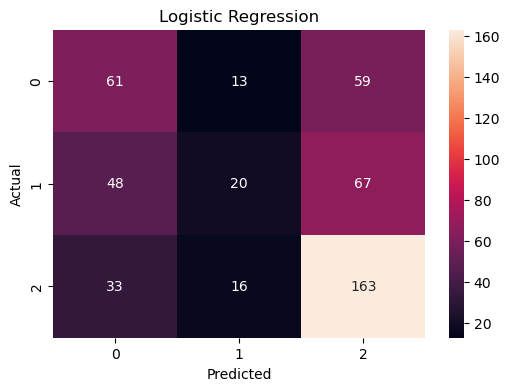

              precision    recall  f1-score   support

           0       0.43      0.46      0.44       133
           1       0.41      0.15      0.22       135
           2       0.56      0.77      0.65       212

    accuracy                           0.51       480
   macro avg       0.47      0.46      0.44       480
weighted avg       0.48      0.51      0.47       480



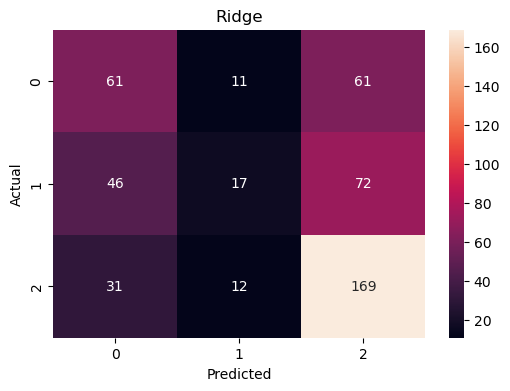

              precision    recall  f1-score   support

           0       0.44      0.46      0.45       133
           1       0.42      0.13      0.19       135
           2       0.56      0.80      0.66       212

    accuracy                           0.51       480
   macro avg       0.48      0.46      0.43       480
weighted avg       0.49      0.51      0.47       480



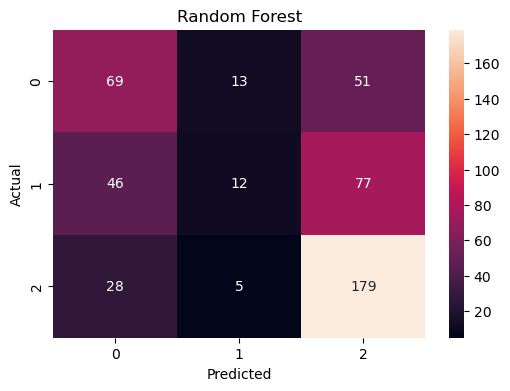

              precision    recall  f1-score   support

           0       0.48      0.52      0.50       133
           1       0.40      0.09      0.15       135
           2       0.58      0.84      0.69       212

    accuracy                           0.54       480
   macro avg       0.49      0.48      0.45       480
weighted avg       0.50      0.54      0.48       480



In [68]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


for name, model in models.items():
    y_pred = model.predict(X_valid)
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_valid, y_pred), annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(name)
    plt.show()
    print(classification_report(y_valid, y_pred))

In [61]:
# Initialize an empty list to store the classification reports
classification_reports = []

# Iterate through the models and generate classification reports
for name, model in models.items():
    y_pred = model.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    # Append the accuracy to the list
    classification_reports.append({'Model': name, 'Accuracy': acc})

# Create a DataFrame from the list
classification_reports = pd.DataFrame(classification_reports)

# Display the classification reports DataFrame
print(classification_reports)

                 Model  Accuracy
0  Logistic Regression  0.506250
1                Ridge  0.514583
2        Random Forest  0.537500


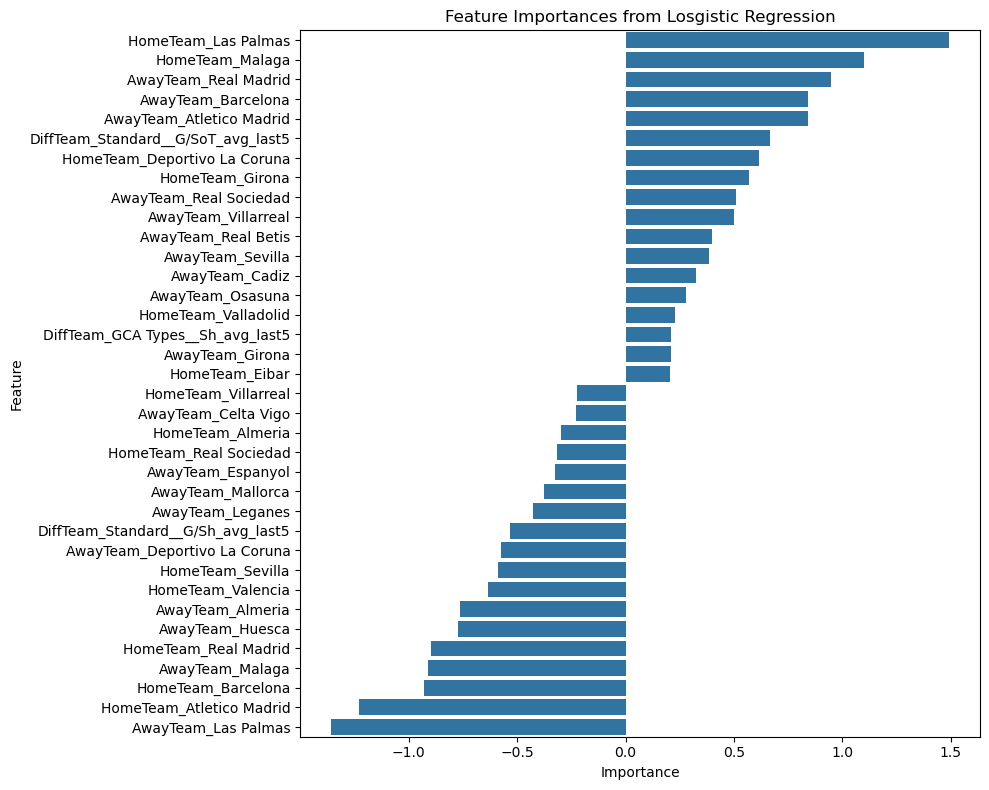

In [62]:
importances = models['Logistic Regression'].coef_[0]
# importances = models['Gradient Boosting'].feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
feature_importance_df = feature_importance_df[feature_importance_df['Importance'].abs() > 0.2]

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Losgistic Regression')
plt.tight_layout()
plt.show()

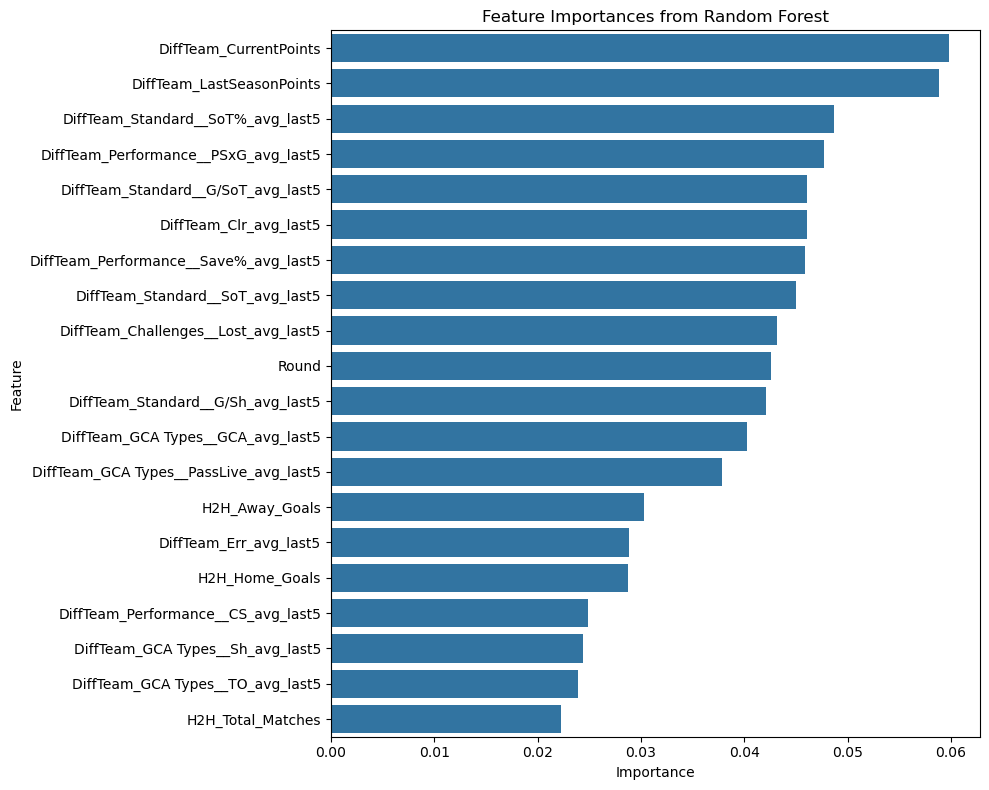

In [63]:
importances = models['Random Forest'].feature_importances_
feature_names = X_train.columns

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:20])
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()

Logistic regression looks at teams' names while random forest cares about other stats